## Working with Open-EAGGR ISEA3H in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/06_isea3h.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/06_isea3h.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/06_isea3h.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/06_isea3h.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2isea3h

In [2]:
from vgrid.conversion.latlon2dggs import latlon2isea3h

lat = 10.775276
lon = 106.706797
res = 12
isea3h_id = latlon2isea3h(lat, lon, res)
isea3h_id

'1312279,-13'

### ISEA3H to Shapely Polygon

In [3]:
from vgrid.conversion.dggs2geo.isea3h2geo  import isea3h2geo

isea3h_geo = isea3h2geo(isea3h_id)
print (isea3h_geo)

POLYGON ((106.76780196296323 10.753216594914733, 106.71642146930662 10.789347853370606, 106.66515419768183 10.773755839870532, 106.66526892069197 10.722102655480096, 106.71664140460638 10.686051924943438, 106.76790720591094 10.701573739220004, 106.76780196296323 10.753216594914733))


### ISEA3H to GeoJSON        

In [4]:
from vgrid.conversion.dggs2geo.isea3h2geo import isea3h2geojson

isea3h_geojson = isea3h2geojson(isea3h_id)
isea3h_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': (((106.76780196296323, 10.753216594914733),
      (106.71642146930662, 10.789347853370606),
      (106.66515419768183, 10.773755839870532),
      (106.66526892069197, 10.722102655480096),
      (106.71664140460638, 10.686051924943438),
      (106.76790720591094, 10.701573739220004),
      (106.76780196296323, 10.753216594914733)),)},
   'properties': {'isea3h': '1312279,-13',
    'resolution': 12,
    'center_lat': 10.737684,
    'center_lon': 106.7165319,
    'avg_edge_len': 6157.358,
    'cell_area': 96171100.113}}]}

### Vector to ISEA3H

Processing features: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


<Axes: >

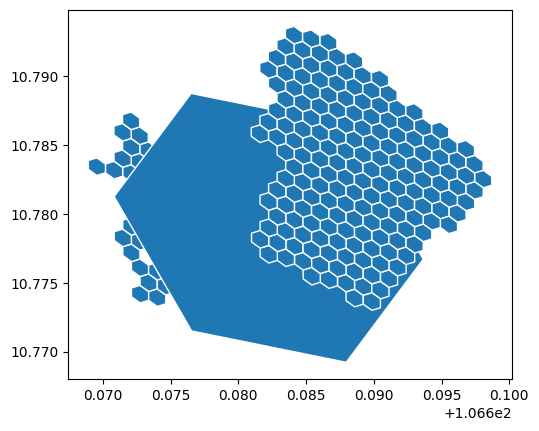

In [5]:
from vgrid.conversion.vector2dggs.vector2isea3h import vector2isea3h

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon.geojson"
)
vector_to_isea3h = vector2isea3h(file_path, resolution=20, compact=False, 
                                predicate = "intersects",output_format="gpd")
# Visualize the output
vector_to_isea3h.plot(edgecolor="white")

### ISEA3H Compact

<Axes: >

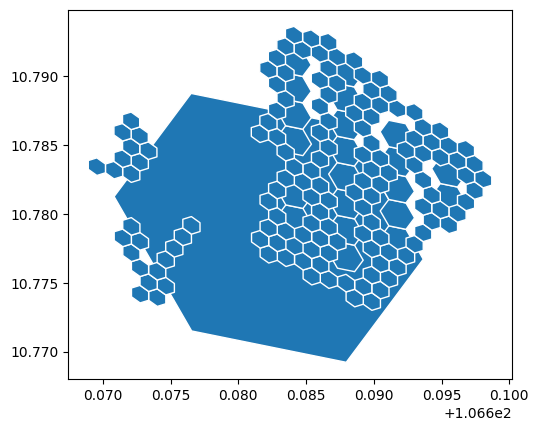

In [6]:
from vgrid.conversion.dggscompact.isea3hcompact  import isea3hcompact

isea3h_compacted = isea3hcompact( vector_to_isea3h, output_format="gpd")
isea3h_compacted.plot(edgecolor="white")

### ISEA3H Expand

<Axes: >

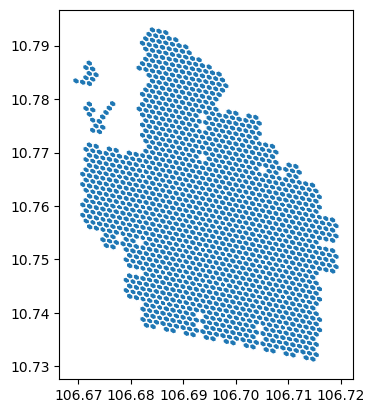

In [7]:
from vgrid.conversion.dggscompact.isea3hcompact import isea3hexpand

isea3h_expanded = isea3hexpand(
    vector_to_isea3h, resolution=20, output_format="gpd"
)
isea3h_expanded.plot(edgecolor="white")

### ISEA3H Generator

Generating ISEA3H DGGS: 100%|██████████| 20/20 [00:00<00:00, 637.94 cells/s]


<Axes: >

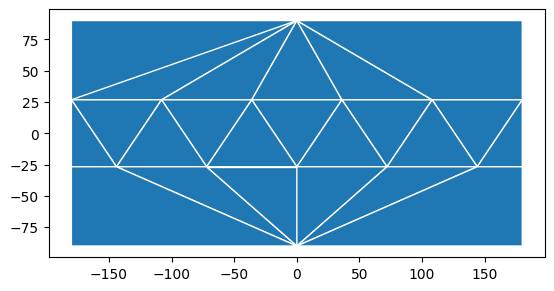

In [8]:
from vgrid.generator.isea3hgrid import isea3hgrid

isea3h_grid = isea3hgrid(resolution=0,output_format="gpd")
isea3h_grid.plot(edgecolor='white')

### ISEA3H Inspect

In [9]:
from vgrid.stats.isea3hstats import isea3hinspect
resolution = 3
isea3h_inspect = isea3hinspect(resolution)
isea3h_inspect.head()

Generating ISEA3H DGGS: 100%|██████████| 2220/2220 [00:05<00:00, 417.64 cells/s]


isea3h  resolution  center_lat  center_lon  avg_edge_len     cell_area  \
0   00030,0           3   52.796491 -144.000000    859534.472  1.927693e+12   
1  0003-1,0           3   38.976164 -144.000000    853461.321  1.893931e+12   
2   00030,1           3   57.699020 -121.162465    852569.447  1.889909e+12   
3   00031,0           3   65.610319 -144.000000    854256.213  1.895550e+12   
4  00030,-1           3   57.699020 -166.837535   1120016.239  1.889909e+12   

   cell_perimeter                                           geometry  crossed  \
0     5157206.834  POLYGON ((-131.28474 52.37359, -136.05347 59.1...    False   
1     5120767.924  POLYGON ((-134.70124 38.65144, -138.77139 45.8...    False   
2     5115416.685  POLYGON ((-108 54.85114, -108 62.05445, -124.6...    False   
3     5125537.275  POLYGON ((-124.68962 64.8145, -131.10399 71.49...    False   
4     6720097.437  MULTIPOLYGON (((-180 54.85114, -168.87861 50.6...    False   

   norm_area       ipq       zsc  
0   1.017849  0.910791  0.952553  
1   1.000022  0.907620  0.950924  
2   0.997898  0.907588  0.950912  
3   1.000877  0.906706  0.950444  
4   0.997898  0.525896  0.723845

### Distribution of ISEA3H Area Distortions

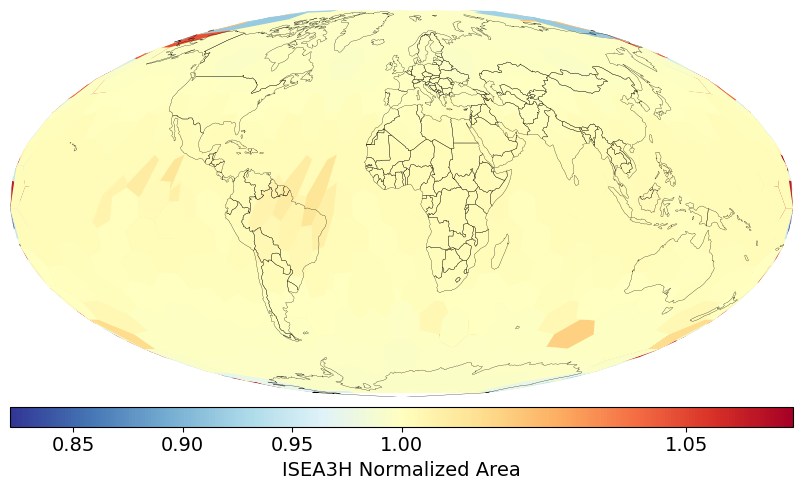

In [10]:
from vgrid.stats.isea3hstats import isea3h_norm_area
isea3h_norm_area(isea3h_inspect)

### Distribution of ISEA3H IPQ Compactness

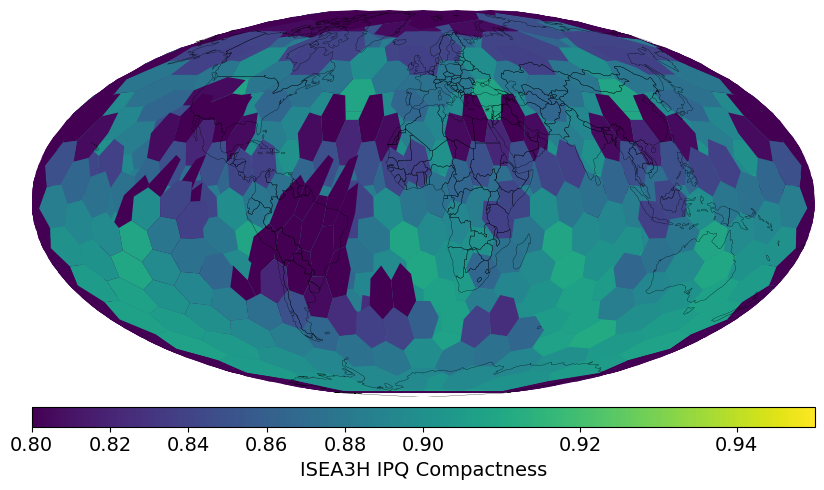

In [11]:
from vgrid.stats.isea3hstats import isea3h_compactness
isea3h_compactness(isea3h_inspect)

### ISEA3H Statistics

In [12]:
from vgrid.stats.isea3hstats import isea3hstats
isea3hstats('km')

resolution                       number_of_cells  avg_edge_len_km  \
0            0                                    20     7.674458e+03   
1            1                                   140     1.184195e+03   
2            2                                   980     4.475835e+02   
3            3                                  6860     1.691707e+02   
4            4                                 48020     6.394050e+01   
5            5                                336140     2.416724e+01   
6            6                               2352980     9.134357e+00   
7            7                              16470860     3.452462e+00   
8            8                             115296020     1.304908e+00   
9            9                             807072140     4.932089e-01   
10          10                            5649504980     1.864154e-01   
11          11                           39546534860     7.045841e-02   
12          12                          276825744020     2.663078e-02   
13          13                         1937780208140     1.006549e-02   
14          14                        13564461456980     3.804397e-03   
15          15                        94951230198860     1.437927e-03   
16          16                       664658611392020     5.434853e-04   
17          17                      4652610279744140     2.054181e-04   
18          18                     32568271958208980     7.764075e-05   
19          19                    227977903707462860     2.934545e-05   
20          20                   1595845325952240020     1.109154e-05   
21          21                  11170917281665680140     4.192206e-06   
22          22                  78196420971659760980     1.584505e-06   
23          23                 547374946801618326860     5.988866e-07   
24          24                3831624627611328288020     2.263579e-07   
25          25               26821372393279298016140     8.555523e-08   
26          26              187749606752955086112980     3.233684e-08   
27          27             1314247247270685602790860     1.222218e-08   
28          28             9199730730894799219536020     4.619548e-09   
29          29            64398115116263594536752140     1.746025e-09   
30          30           450786805813845161757264980     6.599355e-10   
31          31          3155507640696916132300854860     2.494322e-10   
32          32         22088553484878412926105984020     9.427650e-11   
33          33        154619874394148890482741888140     3.563317e-11   
34          34       1082339120759042233379193216980     1.346807e-11   
35          35       7576373845313295633654352518860     5.090452e-12   
36          36      53034616917193069435580467632020     1.924010e-12   
37          37     371242318420351486049063273424140     7.272075e-13   
38          38    2598696228942460402343442913968980     2.748586e-13   
39          39   18190873602597222816404100397782860     1.038868e-13   
40          40  127336115218180559714828702784480020     3.926551e-14   

    avg_cell_area_km2  
0        2.550328e+07  
1        3.643326e+06  
2        5.204751e+05  
3        7.435359e+04  
4        1.062194e+04  
5        1.517420e+03  
6        2.167743e+02  
7        3.096776e+01  
8        4.423966e+00  
9        6.319951e-01  
10       9.028501e-02  
11       1.289786e-02  
12       1.842551e-03  
13       2.632216e-04  
14       3.760309e-05  
15       5.371870e-06  
16       7.674099e-07  
17       1.096300e-07  
18       1.566143e-08  
19       2.237347e-09  
20       3.196210e-10  
21       4.566014e-11  
22       6.522877e-12  
23       9.318396e-13  
24       1.331199e-13  
25       1.901713e-14  
26       2.716733e-15  
27       3.881048e-16  
28       5.544354e-17  
29       7.920505e-18  
30       1.131501e-18  
31       1.616430e-19  
32       2.309185e-20  
33       3.298836e-21  
34       4.712623e-22  
35       6.732319e-23  
36       9.617598e-24  
37       1.373943e-24  
3